In this tutorial, we'll look at the basics of a very popular open source computer vision library, 'OpenCV'. We'll working with the Python version of OpenCV.

We'll start by importing the library and reading an image.

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow as show  # Original imshow() function in cv2 is not supported in colab. So, this is a workaround.

In [ ]:
os.chdir('/content/sample_data')  # My demo image is in this folder.

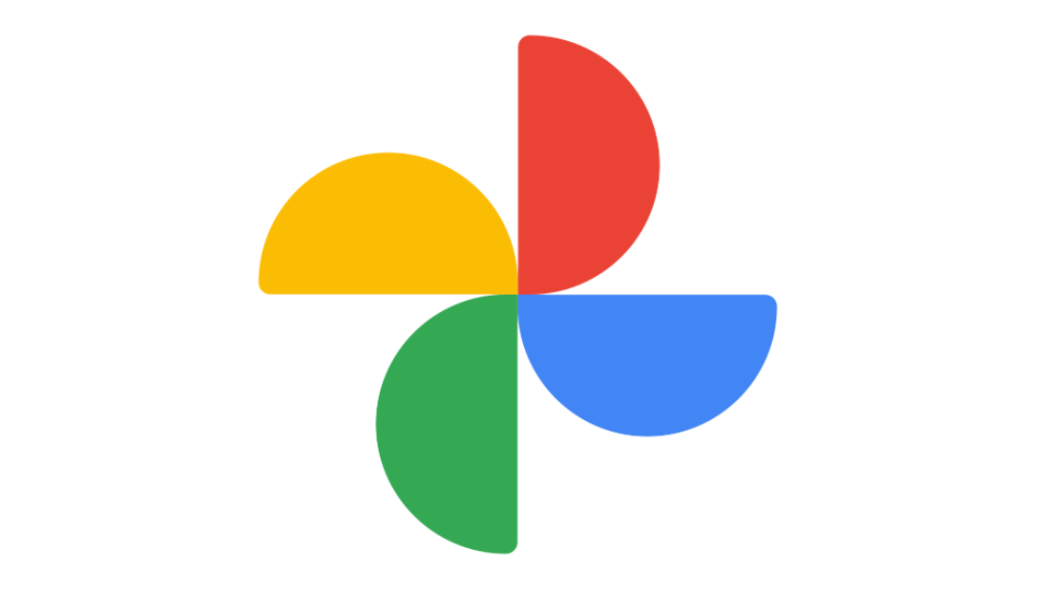

In [ ]:
image = cv2.imread('demo.png')  # Image address is passed as parameter.
show(image)  # To show the image.

We notice the image is quite large to play around with. So, let's resize it. Before doing that, let's first have a look at the shape of the image.

In [ ]:
image.shape

(591, 1049, 3)

So, the image is 591 pixels in height and 1049 pixels in width. It has 3 colour channels, 'RGB'. Let's resize it to roughly half, i.e., 300 x 500.

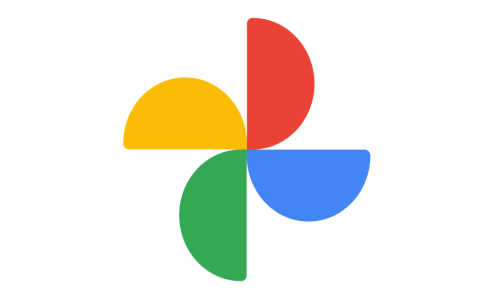

In [ ]:
image = cv2.resize(image, (500,300))  # cv2.resize takes (width,height) as parameters.
show(image)

In [ ]:
image.shape

(300, 500, 3)

Now, it looks much better. There's another way to resize images without explicitly mentioning the values of width and height. Let's try that  out.

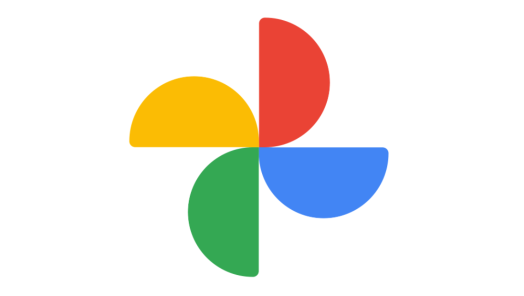

In [ ]:
image = cv2.imread('demo.png')
image = cv2.resize(image, (0,0), fx = 0.5, fy = 0.5)  # Here, we mention the ratios by which width and height are to be scaled.
show(image)

Now, let's look at a grayscle version of the image.

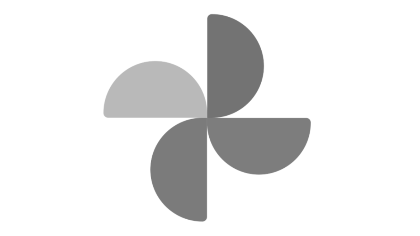

In [ ]:
gray_image = cv2.imread('demo.png', 0)  # The second parameter '0' is used to read the image as a grayscale image.
gray_image = cv2.resize(gray_image, (0,0), fx = 0.4, fy = 0.4)
show(gray_image) 

We can also rotate the image in steps of 90 degrees in any direction.

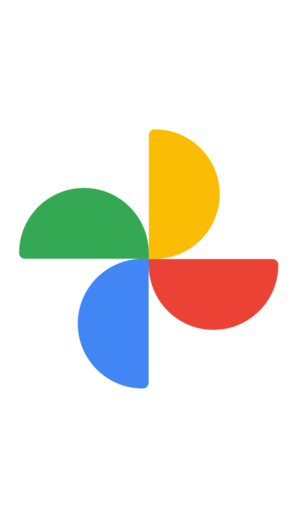

In [ ]:
image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
show(image)

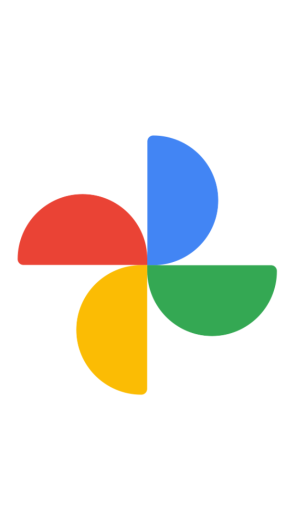

In [ ]:
image = cv2.rotate(image, cv2.cv2.ROTATE_180)
show(image)

Now, let's try to manipulate the image by overwriting its pixel values. Firstly, let's look at how the image is represented.

In [ ]:
image = cv2.imread('demo.png')
image = cv2.resize(image, (0,0), fx = 0.4, fy = 0.4)
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

So, each pixel is represented as an array of RGB values. Since the bordering pixels of our image are all white, we only see arrays of [255, 255, 255] here. We'll try looking at pixels in the center.

In [ ]:
image.shape

(236, 420, 3)

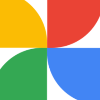

In [ ]:
block = image[70:170, 160:260]
show(block)

In [ ]:
block

array([[[  4, 188, 251],
        [  4, 188, 251],
        [  4, 188, 251],
        ...,
        [ 53,  67, 234],
        [ 53,  67, 234],
        [ 53,  67, 234]],

       [[  4, 188, 251],
        [  4, 188, 251],
        [  4, 188, 251],
        ...,
        [ 53,  67, 234],
        [ 53,  67, 234],
        [ 53,  67, 234]],

       [[  4, 188, 251],
        [  4, 188, 251],
        [  4, 188, 251],
        ...,
        [ 53,  67, 234],
        [ 53,  67, 234],
        [ 53,  67, 234]],

       ...,

       [[ 83, 168,  52],
        [ 83, 168,  52],
        [ 83, 168,  52],
        ...,
        [244, 133,  66],
        [244, 133,  66],
        [244, 133,  66]],

       [[ 83, 168,  52],
        [ 83, 168,  52],
        [ 83, 168,  52],
        ...,
        [244, 133,  66],
        [244, 133,  66],
        [244, 133,  66]],

       [[ 83, 168,  52],
        [ 83, 168,  52],
        [ 83, 168,  52],
        ...,
        [244, 133,  66],
        [244, 133,  66],
        [244, 133,  66]]

Here, we see arrays representing different colours. Now, we'll try to place this block at the top left hand corner of an image.

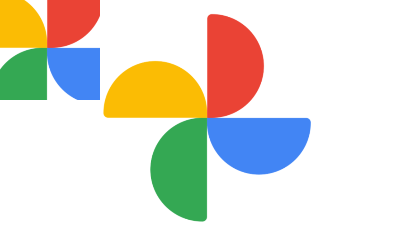

In [ ]:
image[:100,:100] = block
show(image)

There, you go! We can also create random noise in the image by randomly initializing pixel values. Let's do this at the top right hand corner.

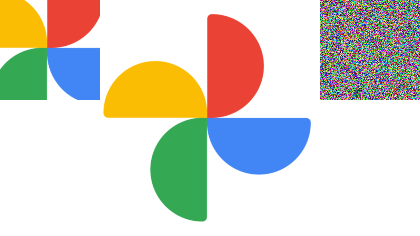

In [ ]:
from random import randint as ri
import numpy as np

random_block = np.zeros((100,100,3))

for i in range(100):
  for j in range(100):
    random_block[i][j] = [ri(0,255), ri(0,255), ri(0,255)]

image[:100, -100:] = random_block

show(image)

We can also create only black and white noise too as follows.

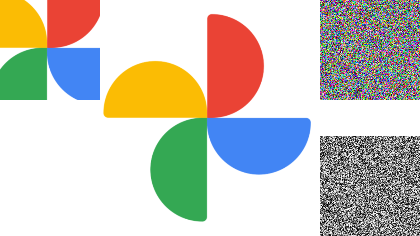

In [ ]:
bw_block = np.zeros((100,100,1))

for i in range(100):
  for j in range(100):
    bw_block[i][j] = [ri(0,255)]

image[-100:, -100:] = bw_block

show(image)

Similarly, we can choose the block to be more red than green or blue as follows.

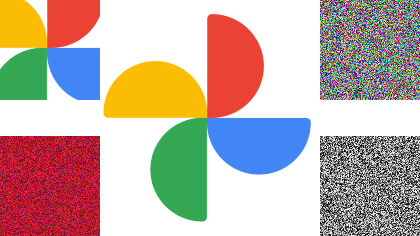

In [ ]:
reddish_block = np.zeros((100,100,3))

for i in range(100):
  for j in range(100):
    reddish_block[i][j] = [ri(0,100), ri(0,50), ri(100,255)]

image[-100:, :100] = reddish_block

show(image)

We can also use this knowledge to crop our image. Let's do that now.

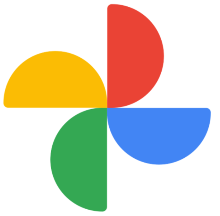

In [ ]:
crop = image[10:-10, 100:-100]
show(crop)

In [ ]:
crop.shape

(216, 220, 3)

So, that's how we could recover our original image without all the noise that we added.

Next, let us draw a line on our image.

In [ ]:
copy = np.copy(crop)  # Creating a copy in order not to disturb the orignal image

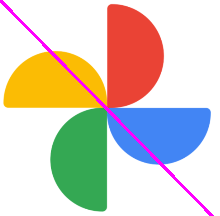

In [ ]:
image = cv2.line(copy, (0,0), (216,220), (255,0,255), 2)
# The parameters are (image, start_coords, end_coords, color, thickness)
show(copy)

Now, let's draw five equally spaced vertical lines across the width of the image.

In [ ]:
x_ticks = np.linspace(0, copy.shape[1], 5, dtype = np.uint8)  # To create evenly spaced points. 
x_ticks 

array([  0,  55, 110, 165, 220], dtype=uint8)

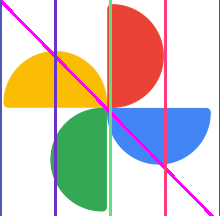

In [ ]:
for i in x_ticks:
  copy = cv2.line(copy, (i,0), (i,copy.shape[0]), (ri(0,255),ri(0,255),ri(0,255)), 2)

show(copy)

Now, let's try to draw rectangles and circles on our image.

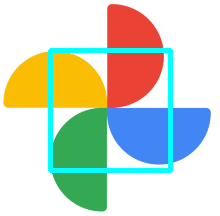

In [ ]:
copy = np.copy(crop)
copy = cv2.rectangle(copy, (50,50), (170,170), (255, 255, 0), 3)
# Parameters are (image, top_left, bottom_right, color, thickness)
show(copy)

In [ ]:
copy = cv2.circle(copy, (110,110), (50), (128, 255, 128), -1)
# Parameters are (image, center, radius, color, thickness (-1 means fill))

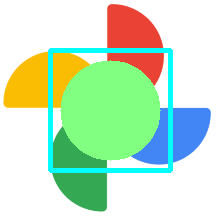

In [ ]:
show(copy)

Finally, let's put some text into the image.

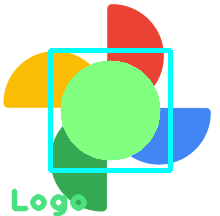

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
copy = cv2.putText(copy, 'Logo', (10,210), font, 2, (128, 225, 75), 3, cv2.LINE_AA)
# Parameters are (image, text, bottom_left, font, magnification, color, thickness, line_type)
show(copy)

So, that's all for this tutorial. Hope it helps you to get started with OpenCV. See you in an other tutorial!